In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in data
The stock data first:

In [2]:
dfs = {}

for ticker in ['BLK', 'GS', 'MS']:
    dfs[ticker] = pd.read_pickle('stock_{}.pickle'.format(ticker)).set_index('Date')

The media data:

In [3]:
df_media = pd.read_csv('MediaAttention_Mini.csv', parse_dates=[0], index_col='Time')

In [4]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2008-01-01 to 2008-12-31
Data columns (total 23 columns):
Morgan_Stanley_count             366 non-null int64
Goldman_Sachs_count              366 non-null int64
BlackRock_count                  366 non-null int64
positive_count                   366 non-null int64
negative_count                   366 non-null int64
Morgan_Stanley_positive_count    366 non-null int64
Morgan_Stanley_negative_count    366 non-null int64
Goldman_Sachs_positive_count     366 non-null int64
Goldman_Sachs_negative_count     366 non-null int64
BlackRock_positive_count         366 non-null int64
BlackRock_negative_count         366 non-null int64
total_msg_count                  366 non-null int64
Morgan_Stanley_frac              366 non-null float64
Goldman_Sachs_frac               366 non-null float64
BlackRock_frac                   366 non-null float64
positive_frac                    366 non-null float64
negative_frac                    366

In [5]:
df_media_long= pd.read_csv('MediaAttentionLong_2008.csv', parse_dates=[0], index_col='Time')

In [7]:
df_media_long.columns = ['{}_Long'.format(c) for c in df_media_long.columns]

In [11]:
df_media_long.loc['2008',:].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2008-01-01 to 2008-12-31
Data columns (total 23 columns):
Morgan_Stanley_count_Long             366 non-null int64
Goldman_Sachs_count_Long              366 non-null int64
BlackRock_count_Long                  366 non-null int64
positive_count_Long                   366 non-null int64
negative_count_Long                   366 non-null int64
Morgan_Stanley_positive_count_Long    366 non-null int64
Morgan_Stanley_negative_count_Long    366 non-null int64
Goldman_Sachs_positive_count_Long     366 non-null int64
Goldman_Sachs_negative_count_Long     366 non-null int64
BlackRock_positive_count_Long         366 non-null int64
BlackRock_negative_count_Long         366 non-null int64
total_msg_count_Long                  366 non-null int64
Morgan_Stanley_frac_Long              366 non-null float64
Goldman_Sachs_frac_Long               366 non-null float64
BlackRock_frac_Long                   366 non-null float64
positive_frac_L

In [12]:
for ticker in dfs:
    dfs[ticker] = dfs[ticker].merge(df_media, how='inner', left_index=True, right_index=True)
    dfs[ticker] = dfs[ticker].merge(df_media_long, how='inner', left_index=True, right_index=True)

In [13]:
dfs['BLK'].head(10)

,Close,diff_1d,diff_7d,Label,Morgan_Stanley_count,Goldman_Sachs_count,BlackRock_count,positive_count,negative_count,Morgan_Stanley_positive_count,...,Goldman_Sachs_frac_Long,BlackRock_frac_Long,positive_frac_Long,negative_frac_Long,Morgan_Stanley_positive_frac_Long,Morgan_Stanley_negative_frac_Long,Goldman_Sachs_positive_frac_Long,Goldman_Sachs_negative_frac_Long,BlackRock_positive_frac_Long,BlackRock_negative_frac_Long
2008-01-02,215.309998,-0.011625,0.007282,0,28,18,10,379,835,0,...,0.012632,0.038246,3.195789,2.284211,0.065263,0.097544,0.034386,0.051579,0.422105,0.256491
2008-01-03,225.800003,-0.006873,0.007158,1,34,17,5,422,986,0,...,0.023881,0.003325,3.678960,2.390568,0.086759,0.154474,0.298670,0.344921,0.003628,0.014813
2008-01-04,210.979996,0.048720,0.006466,0,25,18,5,334,869,0,...,0.014380,0.003887,3.216090,2.342402,0.100272,0.119705,0.041197,0.064905,0.003887,0.018655
2008-01-07,206.699997,-0.065633,-0.005111,0,32,17,10,549,1178,0,...,0.020189,0.005111,5.205980,2.492461,0.081012,0.096857,0.079479,0.061334,0.005111,0.024534
2008-01-08,201.130005,-0.020286,-0.009669,0,26,20,8,569,1186,0,...,0.019526,0.030721,4.860974,2.644884,0.148920,0.126269,0.043478,0.047644,0.376985,0.221297
2008-01-09,199.779999,-0.026947,-0.011106,0,31,24,11,498,1128,0,...,0.031912,0.015086,4.746446,2.964897,0.101247,0.116623,0.118074,0.114012,0.252393,0.143603
2008-01-10,208.830002,-0.006712,-0.012765,1,25,17,6,484,1101,0,...,0.034321,0.003875,4.335455,2.710490,0.132300,0.122059,0.136452,0.123166,0.004428,0.016607
2008-01-11,204.059998,0.045300,-0.004633,0,0,0,0,45,109,0,...,0.023729,0.000000,3.555932,2.288136,0.000000,0.000000,0.149153,0.074576,0.000000,0.000000
2008-01-14,208.399994,-0.022842,-0.006914,1,28,18,7,587,1111,2,...,0.022113,0.010374,5.090636,2.692602,0.095277,0.107016,0.092001,0.068523,0.068250,0.062244
2008-01-15,202.360001,0.021268,-0.010836,0,28,14,7,542,1295,0,...,0.037331,0.005369,5.088213,2.979801,0.181795,0.143697,0.826131,0.689593,0.024802,0.018921


# Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, make_scorer
from sklearn.model_selection import  cross_val_score, KFold

/home/mlisovyi/Drive/anaconda3/envs/dfine_py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=314, n_jobs=4)

In [16]:
for ticker in dfs:
    X = dfs[ticker].drop(['Label', 'Close'], axis=1)
    y = dfs[ticker].loc[:,'Label']
    scores = cross_val_score(model, X, y, 
                             scoring=make_scorer(accuracy_score), 
                             cv=KFold(10, shuffle=True, random_state=314), 
                             n_jobs=1
                            )
    print('{} prediction performance in accuracy = {:.3f}+-{:.3f}'.format(ticker,
                                                                          np.mean(scores),
                                                                          np.std(scores)
                                                                         ))

BLK prediction performance in accuracy = 0.530+-0.082
GS prediction performance in accuracy = 0.534+-0.109
MS prediction performance in accuracy = 0.506+-0.071


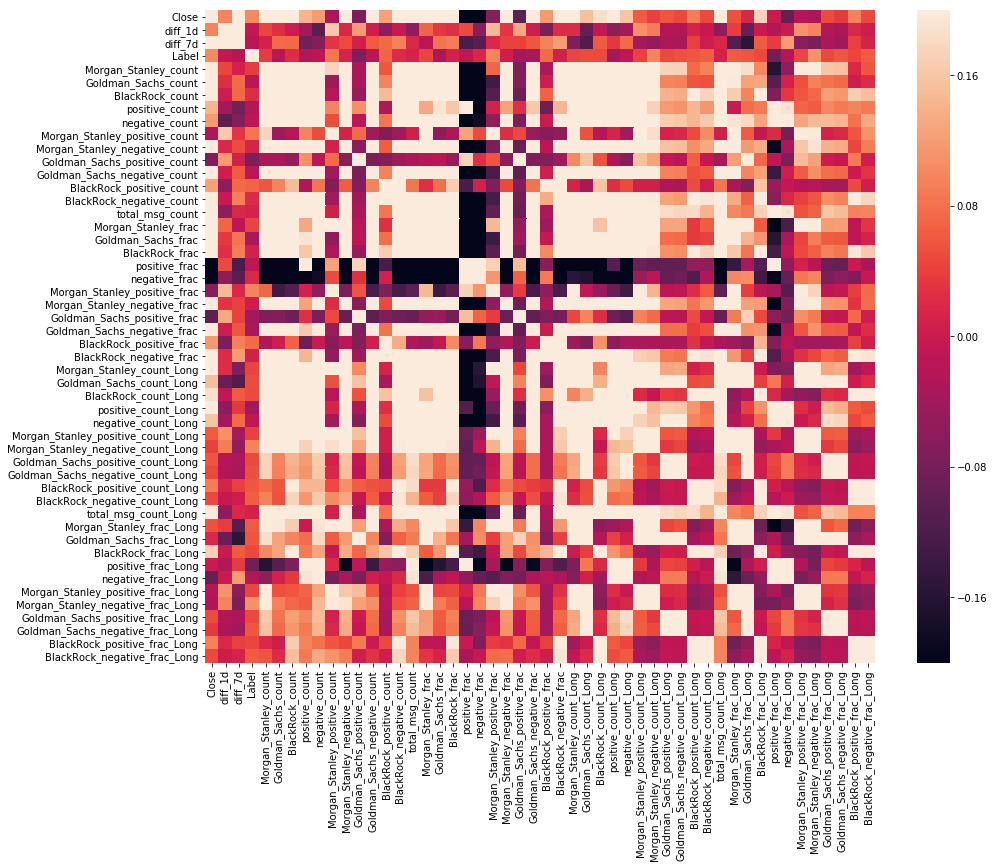

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(dfs['BLK'].corr(), vmin=-0.2, vmax=0.2)

### Train a model on all data

In [18]:
    df = pd.concat(list(dfs.values()), axis=0)
    X = df.drop(['Label', 'Close'], axis=1)
    y = df.loc[:,'Label']
    scores = cross_val_score(model, X, y, 
                             scoring=make_scorer(accuracy_score), 
                             cv=KFold(10, shuffle=True, random_state=314), 
                             n_jobs=1
                            )
    print('{} prediction performance in accuracy = {:.3f}+-{:.3f}'.format('ALL',
                                                                          np.mean(scores),
                                                                          np.std(scores)
                                                                         ))

ALL prediction performance in accuracy = 0.603+-0.060


In [19]:
scores

array([0.69736842, 0.69736842, 0.65789474, 0.53947368, 0.55263158,
       0.57894737, 0.55263158, 0.53947368, 0.57894737, 0.64      ])

In [20]:
mdl = model.fit(X,y)

In [21]:
import shap
shap.initjs()

In [22]:
explainer=shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(X)

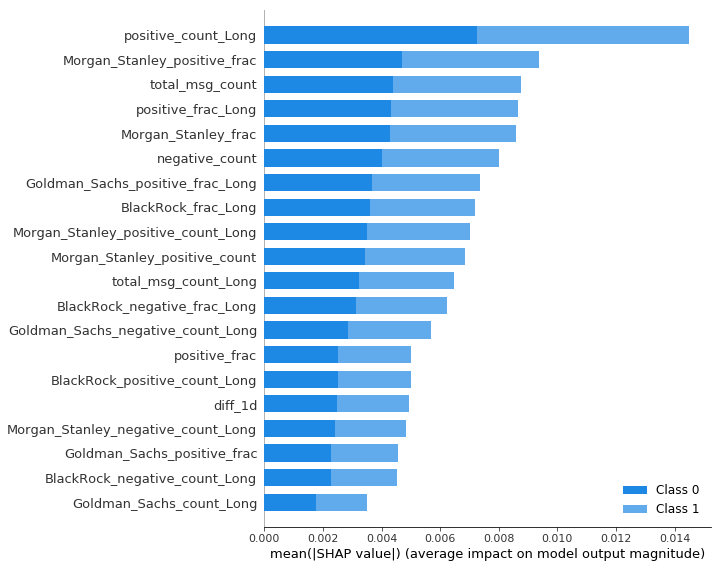

In [23]:
shap.summary_plot(shap_values, X, plot_type="bar")